# First, let's extract the data from wikipedia's pages

In [3]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
    
URL_madrid = 'https://en.wikipedia.org/wiki/Madrid'
response_madrid = requests.get(URL_madrid)

if response_madrid is not None:
    soup = bs4.BeautifulSoup(response_madrid.text, 'html.parser')
    
    table = soup.find('table', {'class':'wikitable sortable floatright'}).tbody
    
rows_madrid = table.find_all('tr')

columns_madrid = [v.text.replace('\n','') for v in rows_madrid[0].find_all('th')]

wiki_madrid = pd.DataFrame(columns=columns_madrid)

for i in range (1, len(rows_madrid)):
    tds = rows_madrid[i].find_all('td')
    
    values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', '')]
    
    wiki_madrid = wiki_madrid.append(pd.Series(values, index=columns_madrid), ignore_index=True)


del wiki_madrid['Area (ha)']

wiki_madrid.rename(columns = {'District':'Neighborhood'}, inplace = True) 

wiki_madrid['City'] = 'Madrid'

wiki_madrid = wiki_madrid[['City','Neighborhood']]

wiki_madrid


,City,Neighborhood
0,Madrid,Centro
1,Madrid,Arganzuela
2,Madrid,Retiro
3,Madrid,Salamanca
4,Madrid,Chamartín
5,Madrid,Tetuán
6,Madrid,Chamberí
7,Madrid,Fuencarral-El Pardo
8,Madrid,Moncloa-Aravaca
9,Madrid,Latina


In [4]:
indexNames = wiki_madrid[wiki_madrid['Neighborhood'] == 'Total' ].index
wiki_madrid.drop(indexNames , inplace=True)

wiki_madrid.tail()

,City,Neighborhood
16,Madrid,Villaverde
17,Madrid,Villa de Vallecas
18,Madrid,Vicálvaro
19,Madrid,San Blas-Canillejas
20,Madrid,Barajas


In [5]:
wiki_lisbon_data = [['Lisbon', 'Alfama'], ['Lisbon', 'Alta de Lisboa'], ['Lisbon', 'Bairro Alto'], ['Lisbon', 'Chiado'], ['Lisbon', 'Lisbon Baixa']] 
  
# Create the pandas DataFrame 
wiki_lisbon = pd.DataFrame(wiki_lisbon_data, columns = ['City', 'Neighborhood']) 

wiki_lisbon

,City,Neighborhood
0,Lisbon,Alfama
1,Lisbon,Alta de Lisboa
2,Lisbon,Bairro Alto
3,Lisbon,Chiado
4,Lisbon,Lisbon Baixa


In [6]:
wiki_amsterdam_data = [['Amsterdam', 'Centrum'], ['Amsterdam', 'Noord'], ['Amsterdam', 'Nieuw-West'], ['Amsterdam', 'Oost'], ['Amsterdam', 'West'], ['Amsterdam', 'Westpoort'], ['Amsterdam', 'Zuid'], ['Amsterdam', 'Zuidoost']] 
  
# Create the pandas DataFrame 
wiki_amsterdam = pd.DataFrame(wiki_amsterdam_data, columns = ['City', 'Neighborhood']) 

wiki_amsterdam

,City,Neighborhood
0,Amsterdam,Centrum
1,Amsterdam,Noord
2,Amsterdam,Nieuw-West
3,Amsterdam,Oost
4,Amsterdam,West
5,Amsterdam,Westpoort
6,Amsterdam,Zuid
7,Amsterdam,Zuidoost


In [7]:
wiki_amsterdam['Address'] = wiki_amsterdam['City']+', '+wiki_amsterdam['Neighborhood']
wiki_amsterdam

,City,Neighborhood,Address
0,Amsterdam,Centrum,"Amsterdam, Centrum"
1,Amsterdam,Noord,"Amsterdam, Noord"
2,Amsterdam,Nieuw-West,"Amsterdam, Nieuw-West"
3,Amsterdam,Oost,"Amsterdam, Oost"
4,Amsterdam,West,"Amsterdam, West"
5,Amsterdam,Westpoort,"Amsterdam, Westpoort"
6,Amsterdam,Zuid,"Amsterdam, Zuid"
7,Amsterdam,Zuidoost,"Amsterdam, Zuidoost"


## Now, let's aggregate all these columns in one unique, and then append them in a single dataframe

In [8]:
wiki_amsterdam = wiki_amsterdam.drop(['City', 'Neighborhood'], axis=1)
wiki_amsterdam

,Address
0,"Amsterdam, Centrum"
1,"Amsterdam, Noord"
2,"Amsterdam, Nieuw-West"
3,"Amsterdam, Oost"
4,"Amsterdam, West"
5,"Amsterdam, Westpoort"
6,"Amsterdam, Zuid"
7,"Amsterdam, Zuidoost"


In [9]:
wiki_lisbon['Address'] = wiki_lisbon['City']+', '+wiki_lisbon['Neighborhood']
wiki_lisbon = wiki_lisbon.drop(['City', 'Neighborhood'], axis=1)
wiki_lisbon

,Address
0,"Lisbon, Alfama"
1,"Lisbon, Alta de Lisboa"
2,"Lisbon, Bairro Alto"
3,"Lisbon, Chiado"
4,"Lisbon, Lisbon Baixa"


In [10]:
wiki_madrid['Address'] = wiki_madrid['City']+', '+wiki_madrid['Neighborhood']
wiki_madrid = wiki_madrid.drop(['City', 'Neighborhood'], axis=1)
wiki_madrid

,Address
0,"Madrid, Centro"
1,"Madrid, Arganzuela"
2,"Madrid, Retiro"
3,"Madrid, Salamanca"
4,"Madrid, Chamartín"
5,"Madrid, Tetuán"
6,"Madrid, Chamberí"
7,"Madrid, Fuencarral-El Pardo"
8,"Madrid, Moncloa-Aravaca"
9,"Madrid, Latina"


In [11]:
step_1 = wiki_madrid.append(wiki_lisbon, ignore_index=True)
step_2 = step_1.append(wiki_amsterdam, ignore_index=True)
step_2

,Address
0,"Madrid, Centro"
1,"Madrid, Arganzuela"
2,"Madrid, Retiro"
3,"Madrid, Salamanca"
4,"Madrid, Chamartín"
5,"Madrid, Tetuán"
6,"Madrid, Chamberí"
7,"Madrid, Fuencarral-El Pardo"
8,"Madrid, Moncloa-Aravaca"
9,"Madrid, Latina"


## We can now start retrieving the latitude and longitude for each neighborhood

In [12]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address_test = 'Amsterdam, Centrum'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address_test)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam, Centrum are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam, Centrum are 52.3737301, 4.8956908.


In [13]:
step_2 = step_2.append({'Address' : 'SoHo, Manhattan'} , ignore_index=True)

step_2['lat'] = ""
step_2['long'] = ""

step_2

,Address,lat,long
0,"Madrid, Centro",,
1,"Madrid, Arganzuela",,
2,"Madrid, Retiro",,
3,"Madrid, Salamanca",,
4,"Madrid, Chamartín",,
5,"Madrid, Tetuán",,
6,"Madrid, Chamberí",,
7,"Madrid, Fuencarral-El Pardo",,
8,"Madrid, Moncloa-Aravaca",,
9,"Madrid, Latina",,


In [15]:
from geopy.geocoders import Nominatim

from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="tor_explorer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
location = step_2['Address'].apply(geocode)
##    location = geolocator.geocode(step_2['Address'][x])
##latitude = location.latitude
##longitude = location.longitude
##step_2['lat'][x] = latitude
##step_2['long'][x] = longitude
    
location

0     (Centro, Madrid, Área metropolitana de Madrid ...
1     (Arganzuela, Madrid, Área metropolitana de Mad...
2     (Retiro, Madrid, Área metropolitana de Madrid ...
3     (Salamanca, Madrid, Área metropolitana de Madr...
4     (Chamartín, Madrid, Área metropolitana de Madr...
5     (Tetuán, Madrid, Área metropolitana de Madrid ...
6     (Chamberí, Madrid, Área metropolitana de Madri...
7     (Fuencarral-El Pardo, Madrid, Área metropolita...
8     (Moncloa-Aravaca, Madrid, Área metropolitana d...
9     (Latina, Madrid, Área metropolitana de Madrid ...
10    (Carabanchel, Madrid, Área metropolitana de Ma...
11    (Usera, Madrid, Área metropolitana de Madrid y...
12    (Puente de Vallecas, Madrid, Área metropolitan...
13    (Moratalaz, Madrid, Área metropolitana de Madr...
14    (Ciudad Lineal, Madrid, Área metropolitana de ...
15    (Hortaleza, Madrid, Área metropolitana de Madr...
16    (Villaverde, Madrid, Área metropolitana de Mad...
17    (Villa de Vallecas, Madrid, Área metropoli

In [16]:
step_2['point'] = location.apply(lambda loc: tuple(loc.point) if loc else None)

step_2['lat'] = location.apply(lambda loc: loc.point[0])
step_2['long'] = location.apply(lambda loc: loc.point[1])

step_2

,Address,lat,long,point
0,"Madrid, Centro",40.417653,-3.707914,"(40.417652700000005, -3.7079137662915533, 0.0)"
1,"Madrid, Arganzuela",40.398068,-3.693734,"(40.39806845, -3.6937339526567428, 0.0)"
2,"Madrid, Retiro",40.408155,-3.677441,"(40.4081555, -3.677441328098954, 0.0)"
3,"Madrid, Salamanca",40.431527,-3.674726,"(40.43152685, -3.6747257985730952, 0.0)"
4,"Madrid, Chamartín",40.460764,-3.677534,"(40.4607638, -3.677534058264615, 0.0)"
5,"Madrid, Tetuán",40.460821,-3.699520,"(40.46082135, -3.6995204270841526, 0.0)"
6,"Madrid, Chamberí",40.436247,-3.703830,"(40.43624735, -3.7038303534513837, 0.0)"
7,"Madrid, Fuencarral-El Pardo",40.556346,-3.778591,"(40.55634555, -3.7785905137518054, 0.0)"
8,"Madrid, Moncloa-Aravaca",40.439495,-3.744204,"(40.43949485, -3.7442035396547055, 0.0)"
9,"Madrid, Latina",40.403532,-3.736152,"(40.4035317, -3.736152, 0.0)"


In [17]:
step_2 = step_2.drop(['point'], axis=1)
step_2

,Address,lat,long
0,"Madrid, Centro",40.417653,-3.707914
1,"Madrid, Arganzuela",40.398068,-3.693734
2,"Madrid, Retiro",40.408155,-3.677441
3,"Madrid, Salamanca",40.431527,-3.674726
4,"Madrid, Chamartín",40.460764,-3.677534
5,"Madrid, Tetuán",40.460821,-3.699520
6,"Madrid, Chamberí",40.436247,-3.703830
7,"Madrid, Fuencarral-El Pardo",40.556346,-3.778591
8,"Madrid, Moncloa-Aravaca",40.439495,-3.744204
9,"Madrid, Latina",40.403532,-3.736152


## Using the Foursquare API, we will be getting the list of venues in a 500 radius from each neighborhood

In [18]:
LIMIT = 100
radius = 500

CLIENT_ID = '4H25UJP1KXWLLQUTTVKRI1WLXOHKNBJDY2HJFDXBP30NUQ4Q' # your Foursquare ID
CLIENT_SECRET = '1R14MX01KYSP2USXQWKBCMMPPTQL4NLSNGQTVR03QM2NSINT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


all_venues = getNearbyVenues(names=step_2['Address'],
                                   latitudes=step_2['lat'],
                                   longitudes=step_2['long']
                                  )

Your credentails:
CLIENT_ID: 4H25UJP1KXWLLQUTTVKRI1WLXOHKNBJDY2HJFDXBP30NUQ4Q
CLIENT_SECRET:1R14MX01KYSP2USXQWKBCMMPPTQL4NLSNGQTVR03QM2NSINT
Madrid, Centro
Madrid, Arganzuela
Madrid, Retiro
Madrid, Salamanca
Madrid, Chamartín
Madrid, Tetuán
Madrid, Chamberí
Madrid, Fuencarral-El Pardo
Madrid, Moncloa-Aravaca
Madrid, Latina
Madrid, Carabanchel
Madrid, Usera
Madrid, Puente de Vallecas
Madrid, Moratalaz
Madrid, Ciudad Lineal
Madrid, Hortaleza
Madrid, Villaverde
Madrid, Villa de Vallecas
Madrid, Vicálvaro
Madrid, San Blas-Canillejas
Madrid, Barajas
Lisbon, Alfama
Lisbon, Alta de Lisboa
Lisbon, Bairro Alto
Lisbon, Chiado
Lisbon, Lisbon Baixa
Amsterdam, Centrum
Amsterdam, Noord
Amsterdam, Nieuw-West
Amsterdam, Oost
Amsterdam, West
Amsterdam, Westpoort
Amsterdam, Zuid
Amsterdam, Zuidoost
SoHo, Manhattan


In [19]:
all_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Madrid, Centro",40.417653,-3.707914,Plaza de Isabel II,40.418114,-3.709397,Plaza
1,"Madrid, Centro",40.417653,-3.707914,Amorino,40.416065,-3.708383,Ice Cream Shop
2,"Madrid, Centro",40.417653,-3.707914,Palacio de Gaviria,40.417139,-3.706044,Art Museum
3,"Madrid, Centro",40.417653,-3.707914,Plaza Mayor,40.415527,-3.707506,Plaza
4,"Madrid, Centro",40.417653,-3.707914,TOC Hostel,40.417264,-3.705928,Hostel
5,"Madrid, Centro",40.417653,-3.707914,La Esquina del Real,40.417356,-3.710364,French Restaurant
6,"Madrid, Centro",40.417653,-3.707914,Chocolatería San Ginés,40.416754,-3.707079,Chocolate Shop
7,"Madrid, Centro",40.417653,-3.707914,Ferpal,40.417046,-3.705742,Restaurant
8,"Madrid, Centro",40.417653,-3.707914,Mercado de San Miguel,40.415443,-3.708943,Market
9,"Madrid, Centro",40.417653,-3.707914,Ale-Hop,40.416386,-3.706014,Gift Shop


In [20]:
all_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Amsterdam, Centrum",100,100,100,100,100,100
"Amsterdam, Nieuw-West",5,5,5,5,5,5
"Amsterdam, Noord",99,99,99,99,99,99
"Amsterdam, Oost",41,41,41,41,41,41
"Amsterdam, West",99,99,99,99,99,99
"Amsterdam, Westpoort",1,1,1,1,1,1
"Amsterdam, Zuid",26,26,26,26,26,26
"Amsterdam, Zuidoost",9,9,9,9,9,9
"Lisbon, Alfama",72,72,72,72,72,72


## We are here counting the number of venues for each category, for each neighborhood

In [22]:
# one hot encoding
onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Yoga Studio,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Now that we have the count, we can calculate the frequency

In [23]:
onehot_grouped = onehot.groupby('Neighborhood').mean().reset_index()
onehot_grouped

,Neighborhood,Yoga Studio,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,...,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store
0,"Amsterdam, Centrum",0.00,0.00,0.000000,0.0000,0.000000,0.010000,0.000000,0.010000,0.000000,...,0.000000,0.01000,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.00
1,"Amsterdam, Nieuw-West",0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
2,"Amsterdam, Noord",0.00,0.00,0.000000,0.0000,0.010101,0.000000,0.010101,0.010101,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
3,"Amsterdam, Oost",0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.04878,0.024390,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
4,"Amsterdam, West",0.00,0.00,0.000000,0.0000,0.010101,0.000000,0.010101,0.010101,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
5,"Amsterdam, Westpoort",0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
6,"Amsterdam, Zuid",0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.038462,0.000000,0.000000,...,0.115385,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
7,"Amsterdam, Zuidoost",0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
8,"Lisbon, Alfama",0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.027778,0.00,0.000000,0.00,0.000000,0.097222,0.000000,0.00
9,"Lisbon, Alta de Lisboa",0.00,0.00,0.285714,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00


In [24]:
num_top_venues = 5

for hood in onehot_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = onehot_grouped[onehot_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amsterdam, Centrum----
         venue  freq
0        Hotel  0.12
1          Bar  0.11
2         Café  0.06
3  Coffee Shop  0.04
4       Bakery  0.04


----Amsterdam, Nieuw-West----
             venue  freq
0       Campground   0.2
1      Men's Store   0.2
2             Lake   0.2
3      Beer Garden   0.2
4  Harbor / Marina   0.2


----Amsterdam, Noord----
         venue  freq
0          Bar  0.11
1        Hotel  0.10
2       Museum  0.05
3  Coffee Shop  0.05
4       Bakery  0.04


----Amsterdam, Oost----
                  venue  freq
0           Coffee Shop  0.07
1     French Restaurant  0.07
2                   Bar  0.05
3                Bakery  0.05
4  Gym / Fitness Center  0.05


----Amsterdam, West----
         venue  freq
0          Bar  0.11
1        Hotel  0.10
2       Museum  0.05
3  Coffee Shop  0.05
4       Bakery  0.04


----Amsterdam, Westpoort----
               venue  freq
0           Heliport   1.0
1        Yoga Studio   0.0
2  Paella Restaurant   0.0
3          Nigh

## I will now get for each neighborhood, the top 10 categories per decreasing frequency

In [25]:
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = onehot_grouped['Neighborhood']

for ind in np.arange(onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(onehot_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Amsterdam, Centrum",Hotel,Bar,Café,Bakery,Coffee Shop,French Restaurant,Museum,Cocktail Bar,Italian Restaurant,Marijuana Dispensary
1,"Amsterdam, Nieuw-West",Harbor / Marina,Lake,Beer Garden,Men's Store,Campground,Women's Store,Electronics Store,Food,Flower Shop,Flea Market
2,"Amsterdam, Noord",Bar,Hotel,Museum,Coffee Shop,Bakery,Café,Cocktail Bar,Marijuana Dispensary,Plaza,Clothing Store
3,"Amsterdam, Oost",Coffee Shop,French Restaurant,Turkish Restaurant,Bakery,Bar,Restaurant,Gym / Fitness Center,Music School,Discount Store,Brewery
4,"Amsterdam, West",Bar,Hotel,Museum,Coffee Shop,Bakery,Café,Cocktail Bar,Marijuana Dispensary,Plaza,Clothing Store


In [29]:
grouped_clustering = onehot_grouped.drop('Neighborhood', 1)

grouped_clustering

,Yoga Studio,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,...,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store
0,0.00,0.00,0.000000,0.0000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.01000,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.00
1,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
2,0.00,0.00,0.000000,0.0000,0.010101,0.000000,0.010101,0.010101,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
3,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.04878,0.024390,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
4,0.00,0.00,0.000000,0.0000,0.010101,0.000000,0.010101,0.010101,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
5,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
6,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,...,0.115385,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
7,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00
8,0.00,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,...,0.000000,0.00000,0.027778,0.00,0.000000,0.00,0.000000,0.097222,0.000000,0.00
9,0.00,0.00,0.285714,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00


## Time to determine which number of clusters would be ideal

In [55]:
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,20):
    kmeans = KMeans(i)
    kmeans.fit(grouped_clustering)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[3.811921306158711,
 2.82334977975514,
 2.51643577172847,
 2.183863644942071,
 1.949368512759996,
 1.6946428421606279,
 1.5158811716344247,
 1.29975884042864,
 1.1127611735923693,
 0.9670306804390091,
 0.8114547517409888,
 0.6746004327152642,
 0.5612161841031461,
 0.4840556902759856,
 0.41602893293731064,
 0.3588647353077159,
 0.31065386244755566,
 0.2758177739970016,
 0.2318156612000611]

Text(0, 0.5, 'WCSS (Within Cluster Sum of Squares')

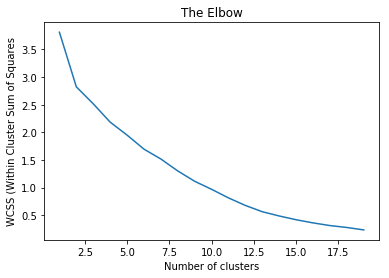

In [56]:
import matplotlib.pyplot as plt

number_clusters = range(1,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares')

## We can see an elbow shape around 13. Lower values present better looking elbows but the K-Mean errors are too high to be relevant

In [45]:
# set number of clusters
kclusters = 13

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:38]

array([ 1, 11,  1,  1,  1,  2,  1,  5,  1,  7,  1,  1,  1,  3, 12,  3,  1,
        3,  3,  3,  9, 10,  6,  3,  8,  3,  3,  0,  3,  8,  4,  1],
      dtype=int32)

In [47]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

step_3 = step_2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
step_3 = step_3.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Address')

## We can now attribute each neighborhood a cluster, then isolate the cluster containing SoHo to get all similar nieghborhood and provide a recommendation to ACME!

In [48]:
step_3

,Address,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Madrid, Centro",40.417653,-3.707914,1.0,Plaza,Hotel,Tapas Restaurant,Gourmet Shop,Hostel,Ice Cream Shop,Wine Bar,Department Store,Restaurant,French Restaurant
1,"Madrid, Arganzuela",40.398068,-3.693734,3.0,Tapas Restaurant,Bakery,Coffee Shop,Restaurant,Grocery Store,Beer Garden,Science Museum,Flea Market,Museum,Food Court
2,"Madrid, Retiro",40.408155,-3.677441,3.0,Spanish Restaurant,Bar,Supermarket,Tapas Restaurant,Art Gallery,Gym,Grocery Store,Bakery,Brewery,Board Shop
3,"Madrid, Salamanca",40.431527,-3.674726,3.0,Spanish Restaurant,Restaurant,Bar,Hotel,Plaza,Burger Joint,Seafood Restaurant,Indian Restaurant,Tapas Restaurant,Grocery Store
4,"Madrid, Chamartín",40.460764,-3.677534,3.0,Restaurant,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Plaza,Nightclub,Grocery Store,Market,Steakhouse,Fried Chicken Joint
5,"Madrid, Tetuán",40.460821,-3.699520,3.0,Spanish Restaurant,Coffee Shop,Supermarket,Grocery Store,Brazilian Restaurant,Bar,Chinese Restaurant,Pizza Place,Music Venue,Resort
6,"Madrid, Chamberí",40.436247,-3.703830,3.0,Tapas Restaurant,Spanish Restaurant,Bar,Restaurant,Café,Theater,Bakery,Plaza,Gastropub,Beer Bar
7,"Madrid, Fuencarral-El Pardo",40.556346,-3.778591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Madrid, Moncloa-Aravaca",40.439495,-3.744204,6.0,Castle,Park,Bus Stop,Women's Store,Dog Run,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
9,"Madrid, Latina",40.403532,-3.736152,10.0,Grocery Store,Bakery,Farmers Market,Park,Student Center,Supermarket,Restaurant,Women's Store,Flea Market,Fish Market


## Here is our final list of neghborhood that would be ideal for ACME to operate in

In [50]:
step_3.loc[step_3['Cluster Labels'] == 1.0]

,Address,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Madrid, Centro",40.417653,-3.707914,1.0,Plaza,Hotel,Tapas Restaurant,Gourmet Shop,Hostel,Ice Cream Shop,Wine Bar,Department Store,Restaurant,French Restaurant
21,"Lisbon, Alfama",38.712287,-9.129858,1.0,Portuguese Restaurant,Café,Wine Bar,Bar,Scenic Lookout,Hotel,Church,Plaza,Ice Cream Shop,Vegetarian / Vegan Restaurant
23,"Lisbon, Bairro Alto",38.714262,-9.146240,1.0,Portuguese Restaurant,Wine Bar,Hotel,Bar,Coffee Shop,Restaurant,Cocktail Bar,Hostel,Lounge,Vegetarian / Vegan Restaurant
24,"Lisbon, Chiado",38.710330,-9.140519,1.0,Plaza,Hostel,Hotel,Bar,Coffee Shop,Café,Portuguese Restaurant,Restaurant,Ice Cream Shop,Clothing Store
25,"Lisbon, Lisbon Baixa",38.710616,-9.139955,1.0,Plaza,Hotel,Hostel,Coffee Shop,Portuguese Restaurant,Café,Restaurant,Ice Cream Shop,Clothing Store,Indian Restaurant
26,"Amsterdam, Centrum",52.373730,4.895691,1.0,Hotel,Bar,Café,Bakery,Coffee Shop,French Restaurant,Museum,Cocktail Bar,Italian Restaurant,Marijuana Dispensary
27,"Amsterdam, Noord",52.372760,4.893604,1.0,Bar,Hotel,Museum,Coffee Shop,Bakery,Café,Cocktail Bar,Marijuana Dispensary,Plaza,Clothing Store
29,"Amsterdam, Oost",52.356608,4.930577,1.0,Coffee Shop,French Restaurant,Turkish Restaurant,Bakery,Bar,Restaurant,Gym / Fitness Center,Music School,Discount Store,Brewery
30,"Amsterdam, West",52.372760,4.893604,1.0,Bar,Hotel,Museum,Coffee Shop,Bakery,Café,Cocktail Bar,Marijuana Dispensary,Plaza,Clothing Store
32,"Amsterdam, Zuid",52.344470,4.878664,1.0,Park,Tram Station,Restaurant,Steakhouse,Bistro,French Restaurant,Breakfast Spot,Bridal Shop,Bus Stop,Café
